# Introdução à Análise de Dados com Pandas

Material baseado no tutorial "Seus primeiros passos como Data Scientist: Introdução ao Pandas!", que pode ser encontrado [aqui](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1)

**Pandas** é uma biblioteca Python que fornece ferramentas de análise de dados e estruturas de dados de alta performance e *fáceis de usar*. Por ser a principal e mais completa biblioteca para estes objetivos, **pandas** é fundamental para análise de dados com Python.

Objetivo do minicurso é fornecer de forma enxuta e simplificada, uma apresentação básica às principais ferramentas fornecidas pelo **pandas**, cobrindo:

- Manipulação; 
- Leitura; e,
- Visualização de dados

### Importando as bibliotecas:

In [7]:
## Importando as bibliotecas
import pandas as pd
import numpy as np

Existem dois tipos principais de estruturas de dados no pandas:
 1. **Series** 
 1. **DataFrame**

## Series

Uma Series é como um array unidimensional, uma lista de valores. Toda Series possui um índice, o `index`, que dá rótulos a cada elemento da lista. Abaixo criamos uma Series `notas`, o `index` desta Series é a coluna à esquerda, que vai de 0 a 4 neste caso, que o pandas criou automaticamente, já que não especificamos uma lista de rótulos.

In [2]:
## Criando uma series
notas = pd.Series([9,10,8,5,7])

Já podemos aqui verificar os atributos da nossa Series, comecemos pelos valores e o índice, os dois atributos *fundamentais* nesta estrutura:

In [3]:
# values
notas.values

array([ 9, 10,  8,  5,  7])

In [8]:
# index
print(notas)

0     9
1    10
2     8
3     5
4     7
dtype: int64


Como ao criar a Series não demos um índice específico o pandas usou os inteiros positivos crescentes como padrão. Pode ser conveniente atribuirmos um índice diferente do padrão, supondo que essas sejam notas de uma turma, poderíamos atribuir nomes ao index:

In [9]:
## Criando uma series com índices definidos
notas = pd.Series([9,10,8,5,7], index=['Mark', 'Julia', 'Peter', 'John', 'Wilfred'])

In [12]:
notas.index = [1,2,3,4,5]

O index nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo:

In [13]:
## Acessando valores
notas

1     9
2    10
3     8
4     5
5     7
dtype: int64

Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas sobre os valores, como **média** `.mean()` e **desvio padrão** `.std()`.

In [15]:
## Verificando média e desvio padrão
print(notas.mean())
print(notas.std())

7.8
1.9235384061671346


Geralmente para resumir brevemente as estatísticas dos dados se usa o `.describe()`

In [16]:
## Utilizar a função describe()
notas.describe()

count     5.000000
mean      7.800000
std       1.923538
min       5.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      10.000000
dtype: float64

A estrutura é flexível o suficiente pra aplicarmos algumas expressões matemáticas e funções matemáticas do numpy diretamente:

In [17]:
## Multiplicação e log (np.log())
np.log(notas)

1    2.197225
2    2.302585
3    2.079442
4    1.609438
5    1.945910
dtype: float64

## DataFrame
Já um DataFrame é uma estrutura bidimensional de dados, como uma planilha. 

In [45]:
## Criando um DataFrame

df = pd.DataFrame({
    'Alunos': ['Mark', 'Julia', 'John', 'Peter', 'Wilfred'],
    'Nota Prova': [10, 9.0, 10, 8, 7],
    'Nota Seminário': [8, 10, 8, 7, 8.5],
    'Faltas': [2, 0, 5, 3, 4]
})

print(df)

    Alunos  Nota Prova  Nota Seminário  Faltas
0     Mark        10.0             8.0       2
1    Julia         9.0            10.0       0
2     John        10.0             8.0       5
3    Peter         8.0             7.0       3
4  Wilfred         7.0             8.5       4


Verificando os tipos de dados que compõe as colunas.

In [26]:
## Tipo dos dados
df.dtypes

Alunos             object
Nota Prova        float64
Nota Seminário    float64
Faltas              int64
dtype: object

É possível acessar a lista de colunas de forma bem intuitiva:

In [27]:
## Colunas do DataFrame
df.columns

Index(['Alunos', 'Nota Prova', 'Nota Seminário', 'Faltas'], dtype='object')

Os nomes das colunas podem ser usadas pra acessar seus valores:

In [31]:
## Acessando valores
df['Nota Prova']

0    10.0
1     9.0
2    10.0
3     8.0
4     7.0
Name: Nota Prova, dtype: float64

Para DataFrames, `.describe()` também é uma boa forma de verificar resumidamente a disposição estatística dos dados numéricos:

In [33]:
## Utilizar a função describe()
df.describe()

,Nota Prova,Nota Seminário,Faltas
count,5.00000,5.000000,5.000000
mean,8.80000,8.300000,2.800000
std,1.30384,1.095445,1.923538
min,7.00000,7.000000,0.000000
25%,8.00000,8.000000,2.000000
50%,9.00000,8.000000,3.000000
75%,10.00000,8.500000,4.000000
max,10.00000,10.000000,5.000000


Outra tarefa comum aplicada em DataFrames é ordená-los por determinada coluna:

In [47]:
## Ordenando pelas notas do seminário
df.sort_values('Nota Prova', ascending=False)

,Alunos,Nota Prova,Nota Seminário,Faltas
0,Mark,10.0,8.0,2
2,John,10.0,8.0,5
1,Julia,9.0,10.0,0
3,Peter,8.0,7.0,3
4,Wilfred,7.0,8.5,4


Note que simplesmente usar o método `sort_values` não modifica o nosso DataFrame original:

In [48]:
## Visualizando DataFrame
df

,Alunos,Nota Prova,Nota Seminário,Faltas
0,Mark,10.0,8.0,2
1,Julia,9.0,10.0,0
2,John,10.0,8.0,5
3,Peter,8.0,7.0,3
4,Wilfred,7.0,8.5,4


Muitas vezes é necessário selecionarmos valores específicos de um DataFrame, seja uma linha ou uma célula específica, e isso pode ser feito de diversas formas. 

In [49]:
# Substituindo o dataset ao fazer uma operação
df = df.sort_values('Nota Prova', ascending=False)

#ou 

df.sort_values('Nota Prova', ascending=False, inplace=True)

Para selecionar pelo index ou rótulo usamos o atributo `.loc`:

In [50]:
## Acessando index pelo .loc[]

df.loc[2]

Alunos            John
Nota Prova          10
Nota Seminário       8
Faltas               5
Name: 2, dtype: object

Para selecionar de acordo com critérios condicionais, se usa o que se chama de **Boolean Indexing**.

Suponha que queiramos selecionar apenas as linhas em que o valor da coluna *Seminário* seja acima de 8.0:

In [51]:
## Boolean Indexing

df[df['Nota Seminário'] > 8]

,Alunos,Nota Prova,Nota Seminário,Faltas
1,Julia,9.0,10.0,0
4,Wilfred,7.0,8.5,4


In [54]:
df['Nota Seminário'] > 8

0    False
2    False
1     True
3    False
4     True
Name: Nota Seminário, dtype: bool

Este tipo de indexação também possibilita checar condições de múltiplas colunas. Diferentemente do que estamos habituados em Python, aqui se usam operadores bitwise, ou seja, `&`, `|`, `~` ao invés de `and`, `or`, `not`, respectivamente. Suponha que além de `df["Seminário"] > 8.0` queiramos que o valor da coluna `Prova` não seja menor que 3:

In [53]:
## Boolean Indexing e condições

df[(df['Nota Seminário'] >8) & (df['Nota Prova'] > 8)]

,Alunos,Nota Prova,Nota Seminário,Faltas
1,Julia,9.0,10.0,0


## Leitura de *datasets*

O pandas nos fornece uma série de funcionalidades de leitura de dados, pros mais diversos formatos estruturais de dados, experimente a auto-completação de `pd.read_<TAB>`, entre eles estão:
 1. `pd.read_csv`, para ler arquivos .csv, formato comum de armazenar dados de tabelas
 1. `pd.read_xlsx`, para ler arquivos Excel .xlsx, é necessário instalar uma biblioteca adicional pra esta funcionalidade.
 
Usaremos para analisar dados externos nesta introdução o `.read_csv`, pois é neste formato que se encontram nossos dados. 

Estes dados que usaremos como exemplo são dados que contêm informações sobre os apps encontrados na Google Play Store. Este dataset está disponível na plataforma Kaggle e você pode encontrá-lo [aqui](https://www.kaggle.com/lava18/google-play-store-apps)

In [56]:
## Lendo um dataset
df = pd.read_csv('data/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Como esperado, o DataFrame tem muitas linhas de dados, pra visualizar sucintamente as primeiras linhas de um DataFrame existe o método `.head()`

In [59]:
## Shape (linhas, colunas)
df.shape

(10841, 13)

In [60]:
## Visualizando o dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Por padrão `.head()` exibe as 5 primeiras linhas, mas isso pode ser alterado:

In [62]:
## Visualizando os n primeiros exemplos do dataset
df.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


Similarmente existe o `.tail()`, que exibe por padrão as últimas 5 linhas do DataFrame:

In [64]:
## Mostra as últimas linhas
df.tail(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [70]:
## Colunas
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Price', 'Content Rating',
       'Genres', 'Last Updated'],
      dtype='object')

In [69]:
## Excluir colunas que não vão ser utilizadas
df.drop(['Size', 'Installs', 'Type', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [74]:
## Ou deixar apenas aquelas que serão utilizadas
df = df[['App', 'Category', 'Rating', 'Reviews', 'Price', 'Content Rating', 'Genres', 'Last Updated']]

In [75]:
## Visualizando os tipos do dataset
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Price              object
Content Rating     object
Genres             object
Last Updated       object
dtype: object

Quantas categorias de apps diferentes existem em nosso dataset? Você pode verificar a informação usando um método que lista os valores únicos numa coluna:

In [79]:
## Listando os valores únicos
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [77]:
## Mostrando a quantidade de categorias
len(df['Category'].unique())

33

Também parece interessante verificarmos a homogeneidade da nossa amostra em relação às categorias. Pra tarefas de contar valores podemos sempre aproveitar de outro método disponível, o `.value_counts()`.

In [81]:
## Quantidade de valores para cada categoria
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

Os valores contados também podem ser normalizados para expressar porcentagens:

In [82]:
## Quantidade de valores para cada geração (normalizado)
df['Category'].value_counts(normalize=True)

FAMILY                 0.181902
GAME                   0.105525
TOOLS                  0.077853
MEDICAL                0.042708
BUSINESS               0.042432
PRODUCTIVITY           0.039111
PERSONALIZATION        0.036159
COMMUNICATION          0.035698
SPORTS                 0.035421
LIFESTYLE              0.035237
FINANCE                0.033761
HEALTH_AND_FITNESS     0.031455
PHOTOGRAPHY            0.030901
SOCIAL                 0.027212
NEWS_AND_MAGAZINES     0.026105
SHOPPING               0.023983
TRAVEL_AND_LOCAL       0.023799
DATING                 0.021585
BOOKS_AND_REFERENCE    0.021308
VIDEO_PLAYERS          0.016142
EDUCATION              0.014390
ENTERTAINMENT          0.013744
MAPS_AND_NAVIGATION    0.012637
FOOD_AND_DRINK         0.011715
HOUSE_AND_HOME         0.008117
AUTO_AND_VEHICLES      0.007841
LIBRARIES_AND_DEMO     0.007841
WEATHER                0.007564
ART_AND_DESIGN         0.005996
EVENTS                 0.005904
PARENTING              0.005535
COMICS  

Agrupar os dados se baseando em certos critérios é outro processo que o pandas facilita bastante com o `.groupby()`.

Abaixo agrupamos o nosso DataFrame pelos valores da coluna `"Category"`, e em seguida aplicamos o `.mean()` ou `.agg('mean')` para termos um objeto GroupBy com informação das médias agrupadas pelos valores da coluna geração. 

In [93]:
## Agrupando pelas categorias

df.groupby(['Category']).mean()

,Rating,Reviews
Category,,
ART_AND_DESIGN,4.358065,2.637600e+04
AUTO_AND_VEHICLES,4.190411,1.369019e+04
BEAUTY,4.278571,7.476226e+03
BOOKS_AND_REFERENCE,4.346067,9.506090e+04
BUSINESS,4.121452,3.033598e+04
COMICS,4.155172,5.638793e+04
COMMUNICATION,4.158537,2.107138e+06
DATING,3.970769,3.115931e+04
EDUCATION,4.389032,2.538191e+05


É comum queremos aplicar uma função qualquer aos dados, ou à parte deles, neste caso o pandas fornece o método `.apply`. Por exemplo, para deixar os nomes das categorias com apenas suas três primeiras letras:

In [94]:
## Aplicação do método apply

def trunca(string):
    return string[:3]

df['Category'].apply(trunca)

0        ART
1        ART
2        ART
3        ART
4        ART
5        ART
6        ART
7        ART
8        ART
9        ART
10       ART
11       ART
12       ART
13       ART
14       ART
15       ART
16       ART
17       ART
18       ART
19       ART
20       ART
21       ART
22       ART
23       ART
24       ART
25       ART
26       ART
27       ART
28       ART
29       ART
        ... 
10811    AUT
10812    FAM
10813    BUS
10814    FAM
10815    BOO
10816    BUS
10817    TOO
10818    FIN
10819    BOO
10820    FAM
10821    FAM
10822    PRO
10823    VID
10824    MED
10825    SOC
10826    SOC
10827    FAM
10828    COM
10829    BOO
10830    NEW
10831    MAP
10832    WEA
10833    BOO
10834    FAM
10835    BUS
10836    FAM
10837    FAM
10838    MED
10839    BOO
10840    LIF
Name: Category, Length: 10841, dtype: object

In [105]:
df.head()

,App,Category,Rating,Reviews,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,Everyone,Art & Design;Creativity,2018-06-20


Iremos utilizar o método apply para modificar os dados da coluna "Last Updated" para um formato de data.

In [97]:
from datetime import datetime

df['Last Updated'] = df['Last Updated'].apply(datetime.strptime, args=('%B %d, %Y',))

Uma das tarefas na qual o pandas é reconhecidamente poderoso é a habilidade de tratar dados incompletos.
Por muitos motivos pode haver incompletude no dataset, o `np.nan` é um valor especial definido no Numpy, sigla para Not a Number, o pandas preenche células sem valores em um DataFrame lido com `np.nan`.

Vamos criar um novo dataframe usando as 5 primeiras linhas do nosso original, usando o já visto `.head()`. Abaixo é usado o `.replace` para substituir um valor específico por um `NaN`. 

In [104]:
## Utilizando o replace()

df2 = df.head()
df2 = df2.replace({'Rating': {4.1: np.nan}})
df2

,App,Category,Rating,Reviews,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,NaN,159,0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,Everyone,Art & Design;Creativity,2018-06-20


O pandas simplifica a remoção de quaiquer linhas ou colunas que possuem um `np.nan`, por padrão o `.dropna()` retorna as linhas que não contém um NaN:

In [107]:
## Excluindo linhas com nan
df2.dropna()

,App,Category,Rating,Reviews,Price,Content Rating,Genres,Last Updated
1,Coloring book moana,ART_AND_DESIGN,3.9,967,0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0,Everyone,Art & Design;Creativity,2018-06-20


Preencher todos os valores NaN por um outro específico também é bastante simples:

In [108]:
## Subistindo valores nan
df2.fillna(df2['Rating'].mean())

,App,Category,Rating,Reviews,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.35,159,0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.90,967,0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,0,Everyone,Art & Design;Creativity,2018-06-20


## Visualização de dados com Pandas

Partiremos agora para visualização de dados com o pandas. Os métodos de visualização do pandas são construídos com base no matplotlib para exploração rápida dos dados.

Comecemos verificando que tanto Series como DataFrame possuem um método `.plot()` que também é um atributo e pode ser encadeado para gerar visualização de diversos tipos, como histograma, área, pizza e dispersão, com respectivamente  `.hist()`, `.area()`, `.pie()` e  `.scatter()`, além de vários outros.

Vamos verificar a distribuição das velocidades usando o encadeamento `.plot.hist()`:

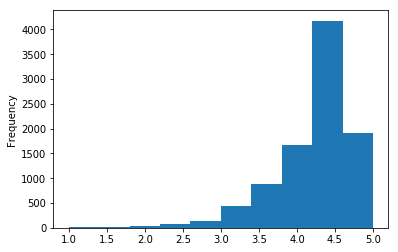

In [110]:
## Histograma
df['Rating'].plot.hist()

Por padrão esse método utiliza 10 bins, ou seja, divide os dados em 10 partes, mas é claro que podemos especificar um valor para a plotagem. Abaixo, além de especificar a quantidade de bins, também especifiquei a cor das bordas como preta, que por padrão é transparente.

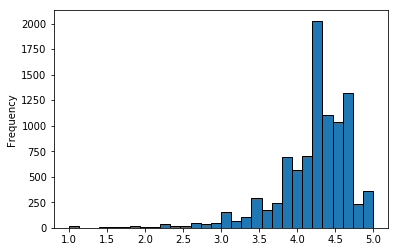

In [111]:
## Histograma
df['Rating'].plot.hist(bins=30, edgecolor='black')

Podemos usar os valores de contagem de cada geração como exemplo de dado para um plot tanto de barras verticais quando de barras horizontais, para verificar visualmente esses dados:

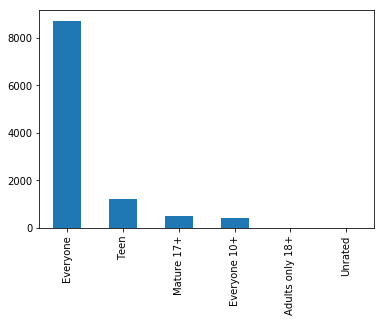

In [112]:
## Gráfico de barras verticais

df['Content Rating'].value_counts().plot.bar()

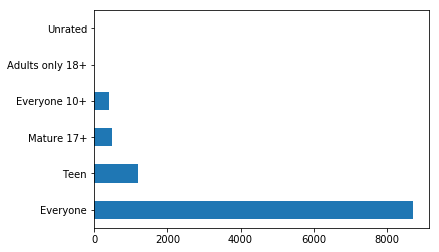

In [113]:
## Gráfico de barras horizontais
df['Content Rating'].value_counts().plot.barh()

Os métodos são flexíveis o suficiente para aceitarem argumentos como um título para a imagem:

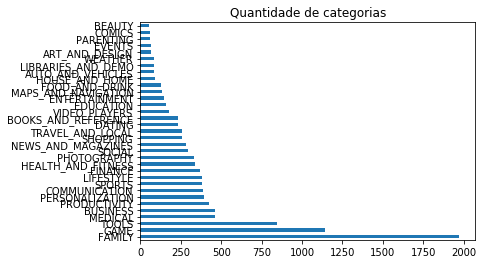

In [114]:
## Adicionando título

df['Category'].value_counts().plot.barh(title='Quantidade de categorias')

Um gráfico de dispersão usando um DataFrame pode ser usado especificando-se quais colunas usar como dados no eixo x e y:

In [ ]:
## Gráfico de dispersão

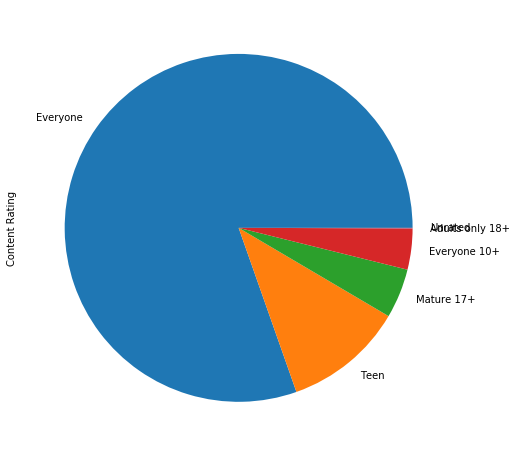

In [116]:
## Gráfico de pizza
df['Content Rating'].value_counts().plot.pie(figsize=(8,8))

In [ ]:
# Drop no Unrated

## Salvando DataFrame 

Finalmente, a tarefa de salvar seu DataFrame externamente para um formato específico é feita com a mesma simplicidade que a leitura de dados é feita no pandas, pode-se usar, por exemplo, o método `to_csv`, e o arquivo será criado com os dados do DataFrame:

In [118]:
## Salvando um novo DataFrame no computador

df.to_csv('dados_playstore_modificados.csv', sep=',')

In [120]:
df = pd.DataFrame({
    'Alunos': ['Mark', 'Julia', 'John', 'Peter', 'Wilfred'],
    'Nota Prova': [10, 9.0, 10, 8, 7],
    'Nota Seminário': [8, 10, 8, 7, 8.5],
    'Faltas': [2, 0, 5, 3, 4]
})

df.to_csv('notas_alunos.csv', sep=';', index=False)